# 대전광역시 흡연위험지수 산출 및 시각화

지자체에서 제공하는 공공데이터를 토대로 흡연 및 금연지역과 관련된 데이터가 포함되어있습니다.  
EDA의 목표는 흡연지수산출을 위한 각 feature들의 패턴 및 인사이트 발견입니다.

## 데이터셋 살펴보기

총 7개의 전처리된 csv 파일이 준비되었고, 데이터 병합작업을 통해 df.pickle 파일로 EDA를 진행합니다.

1. 과태료 (2807, 7)
2. 금연구역 (44475, 7)
3. 병의원 (2300, 7)
4. 주차장 (850, 6)
5. 상권정보 (75145, 9)
6. 지역사회건강조사 설문 (4610, 6)
7. 주민등록인구 (164, 9)

## 라이브러리 및 함수 준비

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 100, "display.max_columns", 50)
from datetime import date

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

color = sns.color_palette()

# import matplotlib.font_manager as fm  # 폰트 관련 용도
# font_path = 'C:/Users/JBY/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
# font_name = fm.FontProperties(fname=font_path, size=10).get_name()
# plt.rc('font', family=font_name, size=15)
# plt.rcParams['axes.unicode_minus'] = False
# fm._rebuild()

In [ ]:
# Annotate text on graph
def annotate_text(p, append_to_text='%'):
    for p in ax.patches:
        txt = str(p.get_height().round(2)) + append_to_text
        txt_x = p.get_x() + p.get_width()/2.
        txt_y = 0.92*p.get_height()
        ax.text(txt_x,txt_y,txt, fontsize=20, color='#004235', ha='center', va='bottom')

In [ ]:
PATH = 'D:/project/데이터 분석 프로젝트/이노포스트/data/전처리 완료 데이터/'
# PATH = 'G:/다른 컴퓨터/My_desktop/project/데이터 분석 프로젝트/이노포스트/data/전처리 완료 데이터/'


In [ ]:
# colab용 구글 드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

## 데이터 로드

In [ ]:
# fine = pd.read_csv(PATH + '과태료_전처리(완)_1205.csv', encoding='cp949')
# nszone = pd.read_csv(PATH + '금연구역_전처리(완)_1205.csv', encoding='cp949')
# hospital = pd.read_csv(PATH + '병의원_전처리(완)_1205.csv', encoding='cp949')
# parking = pd.read_csv(PATH + '주차장_전처리(완)_1205.csv', encoding='cp949')
# comm = pd.read_csv(PATH + '상권정보_전처리(완)_1205.csv', encoding='cp949')
# survey = pd.read_csv(PATH + '지역사회건강조사_전처리(완)_1205.csv', encoding='cp949')
# population = pd.read_csv(PATH + '주민등록인구_전처리(완)_1205.csv', encoding='cp949')

# print('done')

In [ ]:
# df 불러오기
df = pd.read_pickle(PATH + 'EDA.pkl')

In [ ]:
df.head(2)

,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
0,설문,대덕구,1,0.0,0.0,0,0,0,0,0,0,0,0,0,남자,1,8,0,0,0,0,0
1,설문,대덕구,1,0.0,0.0,0,0,0,0,0,0,0,0,0,여자,8,8,0,0,0,0,0


In [ ]:
df.shape

(130350, 22)

## 과태료

체크리스트

* 과태료의 형태 
* 구 별 과태료 발생 현황
    * 액수 합계
    * 발생 건수 합계
* 행정동 별 과태료 발생 현황
     * 액수 합계
     * 발생 건수 합계
* 연도별 과태료 발생 추이

In [ ]:
fine = df[df['구분']=='과태료'].reset_index()
fine.head(2)

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
0,917,과태료,대덕구,대화동,127.416588,36.363914,2016-10-04,80000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,918,과태료,대덕구,대화동,127.415047,36.363464,2017-11-27,80000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
fine['index'] = fine['index'].reset_index(drop=True)

In [ ]:
# null check
fine.isnull().sum()

index      0
구분         0
구          0
행정동        0
경도         0
위도         0
부과일자       0
최초본세       0
분류         0
이름         0
병원유형       0
주차장유형      0
대분류        0
중분류        0
소분류        0
성별         0
담배흡연       0
액상흡연       0
total      0
0~19세      0
20~39세     0
40~59세     0
60 over    0
dtype: int64

### 과태료 확인

In [ ]:
print(sorted(fine['최초본세'].unique()))
fine['최초본세'].value_counts()

[12000, 15000, 24000, 30000, 40000, 50000, 80000, 100000, 1360000]


80000      1779
100000      803
24000       141
40000        35
30000        29
50000        14
12000         3
15000         1
1360000       1
Name: 최초본세, dtype: int64

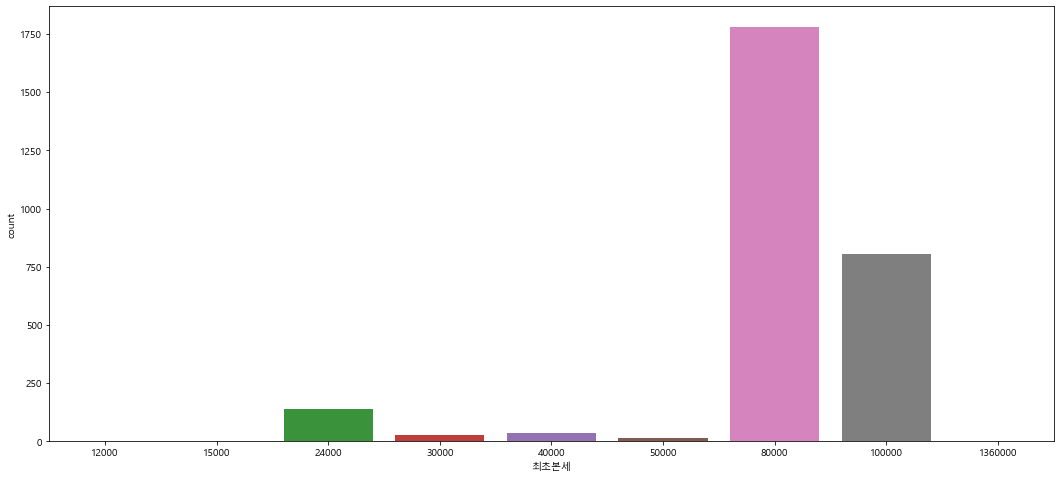

In [ ]:
plt.figure(figsize=(18,8))
data = fine.groupby('index')['최초본세'].max().reset_index()
sns.countplot(x='최초본세', data=data)
plt.show()

1.2만원부터 136만원까지 존재하며  
8만원과 10만원이 가장 많이 부과되었다.  
136만원?

In [ ]:
fine[fine['최초본세'] > 100000]

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
2622,121853,과태료,중구,용두동,127.41449,36.32407,2015-04-10,1360000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


이상치로 보인인다.  

In [ ]:
# 136만원 제거
idx = fine[fine['최초본세'] > 200000].index
fine = fine.drop(idx)
df = df.drop(idx)

### 구 & 행정동 별 과태료 발생현황

In [ ]:
temp_fine = fine.groupby('구')['최초본세'].value_counts()
temp_fine

구    최초본세  
대덕구  80000     175
     100000     98
     24000       9
     40000       6
     50000       2
동구   80000     118
     100000     47
     24000      17
     30000       4
     40000       3
서구   80000     977
     100000    473
     24000      74
     40000      16
     30000      13
     50000       8
     12000       1
     15000       1
유성구  80000     180
     100000     65
     24000      19
     30000       6
     50000       2
     12000       1
     40000       1
중구   80000     329
     100000    120
     24000      22
     40000       9
     30000       6
     50000       2
     12000       1
Name: 최초본세, dtype: int64

In [ ]:
print(fine.groupby('구')['최초본세'].sum())
print(fine.groupby('구')['최초본세'].sum()/fine['최초본세'].sum())

구
대덕구     24356000
동구      14788000
서구     128693000
유성구     21688000
중구      39500000
Name: 최초본세, dtype: uint32
구
대덕구    0.106346
동구     0.064569
서구     0.561917
유성구    0.094697
중구     0.172470
Name: 최초본세, dtype: float64


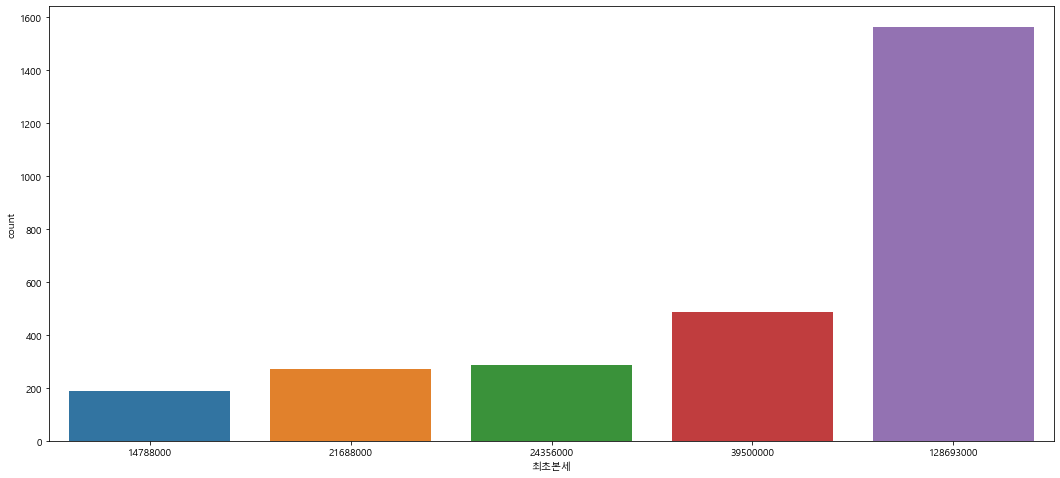

In [ ]:
plt.figure(figsize=(18,8))
data = fine.groupby('구')['최초본세'].sum()
sns.countplot(x=fine['구'], data=data)
plt.show()

# x축을 구, y축을 과태료의 합계로 표현하고 싶은데..

## 금연구역

In [ ]:
fine = df[df['구분']=='과태료'].reset_index()
fine.head(2)

In [ ]:
nszone = df[df['구분']=='금연구역'].reset_index(drop=True)
nszone.head(3)

,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
0,금연구역,대덕구,구즉동,127.387474,36.434422,0,0,청사,문평119안전센터,0,0,0,0,0,0,0,0,0,0,0,0,0
1,금연구역,대덕구,대화동,127.410622,36.364574,0,0,학원,미레도음악학원,0,0,0,0,0,0,0,0,0,0,0,0,0
2,금연구역,대덕구,대화동,127.411880,36.367062,0,0,음식점,식풍경대화점,0,0,0,0,0,0,0,0,0,0,0,0,0


## 상권정보

체크리스트

* 공공시설 추출
  * 목욕탕
  * ??
* 흡연취약계층이 주로 이용하는 시설들
  * 유치원 / 초등학교 / 중학교 / 고등학교
  * 학원
  * PC방
  * 태권도장 등 운동관련
  * ???
* 흡연이 자주 발생하는 시설들
  * 음식점 앞
  * 술집 앞
  * 당구장 앞?
* 행정동 별 상권 확인
  * 공공시설 분포 확인
  * 학원시설 분포 확인
  * 레저시설 분포 확인

In [ ]:
comm = df[df['구분']=='상권정보'].reset_index()
comm.head(3)

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
0,1323,상권정보,대덕구,대화동,127.402939,36.365295,0,0,0,씨엠바이오메드,0,0,소매,사무/문구/컴퓨터,사무/문구용품,0,0,0,0,0,0,0,0
1,1324,상권정보,대덕구,대화동,127.412880,36.363522,0,0,0,이레컴퓨터,0,0,소매,사무/문구/컴퓨터,컴퓨터/사무용기기종합,0,0,0,0,0,0,0,0
2,1325,상권정보,대덕구,대화동,127.402939,36.365295,0,0,0,우리OA,0,0,소매,사무/문구/컴퓨터,사무/문구용품,0,0,0,0,0,0,0,0


In [ ]:
comm_aca = comm[comm['소분류'].str.contains('학원')]

In [ ]:
comm_aca['소분류'].unique()

array(['학원-입시', '학원-기타', '학원-외국어/어학', '학원-주산암산부기속셈', '학원(종합)', '학원-경영',
       '학원-공예', '학원-간호조무사', '학원-국악', '학원-어린이영어', '학원-웅변', '학원-스포츠/재즈댄스',
       '학원-자동차운전', '학원-에어로빅', '학원-펜글씨/한문', '학원-중장비', '학원-도배', '컴퓨터학원',
       '학원-목공예', '학원-요리', '학원-미용', '학원-바둑', '학원-가요', '학원-무용', '학원-제과기술',
       '학원-꽃꽃이', '학원-전자통신', '학원-사교춤', '학원-애견미용', '학원-서당', '학원-말더듬',
       '학원-심리변론', '학원-속독', '학원-공인중개사', '학원-배우/탤런트', '학원-검정고시', '학원-디자인',
       '학원-스튜디어스', '학원-편입', '학원-칵테일', '학원-국가고시', '학원-모델', '학원-항공기술',
       '학원-피부미용', '학원-사진', '학원-마술', '학원-미싱자수', '학원-전기기술', '학원-경리',
       '학원-목욕관리사', '학원-만화영화', '학원-실내운전', '학원-속기', '학원-텔렉스/통신', '학원/국가고시',
       '학원-복장'], dtype=object)

## 주차장

체크리스트
* 주차장의 분포
  * 구 별 주차장 개수
  * 행정동 별 주차장 개수
* 주차장 유형별 비율
  * 노상 주차장에서 흡연이 많이 발생하지 않을까?

In [ ]:
parking = df[df['구분']=='주차장'].reset_index()
parking.head(3)

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
0,1321,주차장,대덕구,대화동,127.417603,36.363564,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
1,1322,주차장,대덕구,대화동,127.417603,36.363564,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
2,3598,주차장,대덕구,목상동,127.404182,36.446407,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0


## 지역사회건강조사(흡연율)
8 = 해당안됨  
즉 8번은 비흡연, 그 외는 흡연자

체크리스트
* 총 응답인원 대비 흡연율
  * 남자 응답자 흡연율
  * 여자 응답자 흡연율
* 구 별 흡연율
  * 구 별 성별에 따른 흡연율


In [ ]:
survey = df[df['구분']=='설문'].reset_index()
survey.head(3)

## 인구

체크리스트

* 구 별 인구분포
  * 취약계층 인구분포
* 동 별 인구분포
  * 취약계층 인구분포
* 지역사회건강조사에서 동별, 성별별 흡연율이 구해졌다면 총 인구에 흡연율을 적용해보기


In [ ]:
population = df[df['구분']=='인구'].reset_index()
population.head(3)

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
0,1870,인구,대덕구,대화동,0.0,0.0,0,0,0,0,0,0,0,0,0,남자,0,0,3520,365,818,1240,1097
1,1871,인구,대덕구,대화동,0.0,0.0,0,0,0,0,0,0,0,0,0,여자,0,0,3184,297,648,994,1245
2,3086,인구,대덕구,덕암동,0.0,0.0,0,0,0,0,0,0,0,0,0,남자,0,0,7141,872,2125,2466,1678
